In [77]:
import gzip
import numpy as np
p = gzip.open('C:/Users/Kedar/Desktop/AML/train-labels-idx1-ubyte.gz','r')
p.read(8)
buf2 = p.read(8 * 1 * 60000)
Y_train = np.frombuffer(buf2, dtype=np.uint8).astype(np.float32)
#Y_train = Y_train.reshape(60000, 10*1)
Y_train.shape

(60000,)

In [78]:
f = gzip.open('C:/Users/Kedar/Desktop/AML/train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(28 * 28 * 60000)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [92]:
p1 = gzip.open('C:/Users/Kedar/Desktop/AML/t10k-labels-idx1-ubyte.gz','r')
p1.read(8)
buf2 = p1.read(8 * 1 * 60000)
Y_test = np.frombuffer(buf2, dtype=np.uint8).astype(np.float32)
#Y_train = Y_train.reshape(60000, 10*1)
Y_test.shape

(10000,)

In [93]:
f1 = gzip.open('C:/Users/Kedar/Desktop/AML/t10k-images-idx3-ubyte.gz','r')
f1.read(16)
buf = f1.read(28 * 28 * 60000)
X_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test = X_train.reshape(60000, 28 * 28)
X_test.shape

(60000, 784)

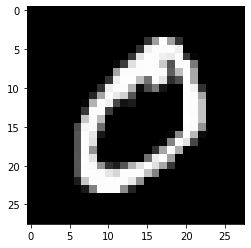

In [88]:
#import cv2
img = X_train[1].reshape(28, 28, 1)
#img2 = cv2.resize(img,(7,7))
num = plt.imshow(img, cmap=plt.get_cmap('gray'))


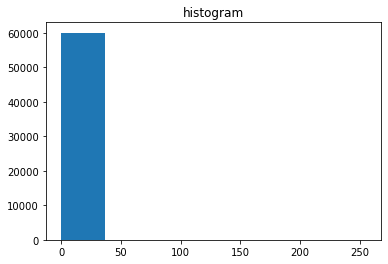

In [80]:
plt.hist(X_train[:,0], bins = np.linspace(0, 255, 8)) 
plt.title("histogram") 
plt.show()

High median = 3146, index = 407


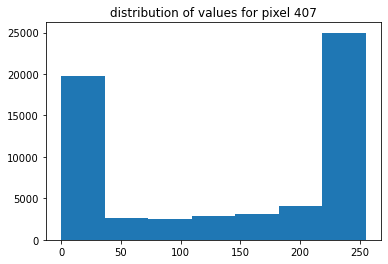

In [81]:
from matplotlib import pyplot as plt 
import numpy as np  

high_med = -1
high_i = -1
for i in range(0,X_train.shape[1]):
    arr = np.histogram(X_train[:,i], bins = np.linspace(0, 255, 8))
    med = np.median(arr[0])
    if med > high_med:
        high_med = med
        high_i = i

print('High median = %i, index = %i' % (high_med, high_i))
plt.hist(X_train[:,high_i], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for pixel 407") 
plt.show()

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisticReg = LogisticRegression()

logisticReg.fit(X_train, Y_train)
predictions = logisticReg.predict(X_train)
acc =accuracy_score(Y_train, predictions)
print('Log Reg AUC: %0.5f' % acc )



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log Reg AUC: 0.93392


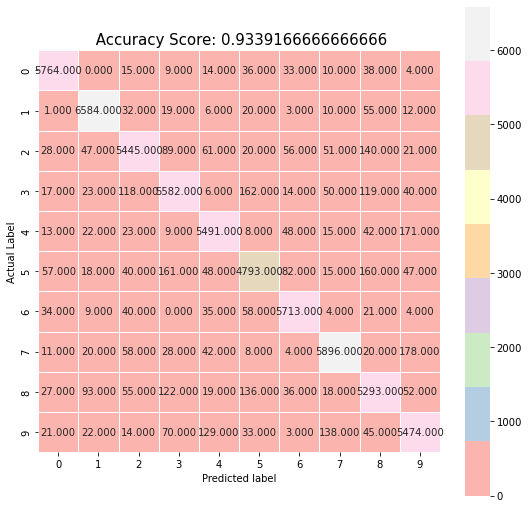

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm= metrics.confusion_matrix(Y_train, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap ='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted label");
all_sample_title =" Accuracy Score: {0}".format(acc)
plt.title(all_sample_title, size =15);

In [103]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train, Y_train)
predicter = mnb.predict(X_train)
Acc =accuracy_score(Y_train, predicter)
print('NB AUC: %0.5f' % Acc)


NB AUC: 0.82528


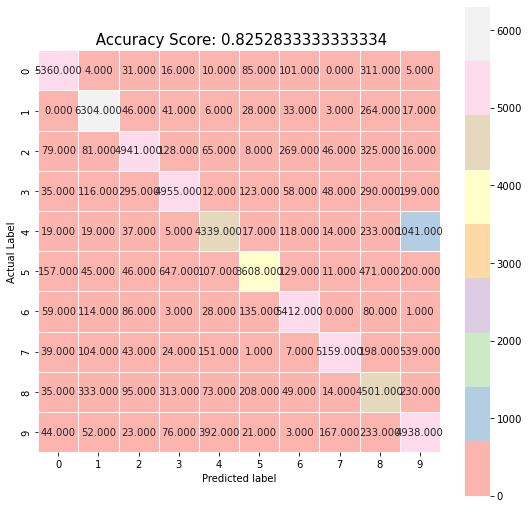

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm= metrics.confusion_matrix(Y_train, predicter)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap ='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted label");
all_sample_title =" Accuracy Score: {0}".format(Acc)
plt.title(all_sample_title, size =15);